# **Decision Trees & Random Forests For Classification & Regression**

In this project, we apply tree-based machine learning models for classification tasks using the Heart Disease Dataset.  
We explore Decision Trees and Random Forests, analyze overfitting, control tree depth, interpret feature importances, and evaluate models using cross-validation.


**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from io import StringIO
import graphviz

**Load And Explore Data**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info() #basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Statistical Analysis**

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Checking For Missing Values**

In [7]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**Visualize Target Distribution**

/tmp/ipython-input-8-3109129003.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


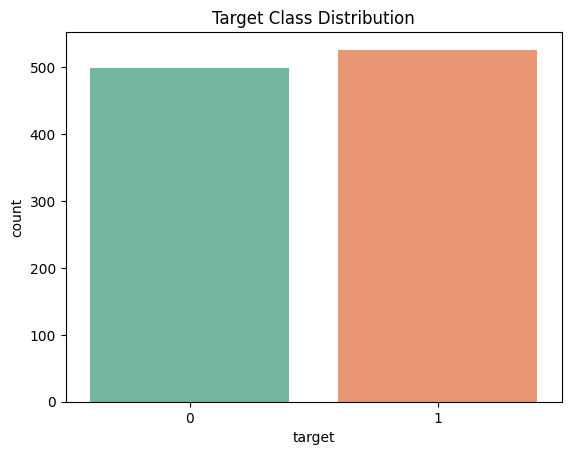

In [8]:
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Target Class Distribution')
plt.show()

**Decision Tree Classifier**

In [9]:
X = df.drop('target', axis=1)
y = df['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Evaluation
y_pred = dtree.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



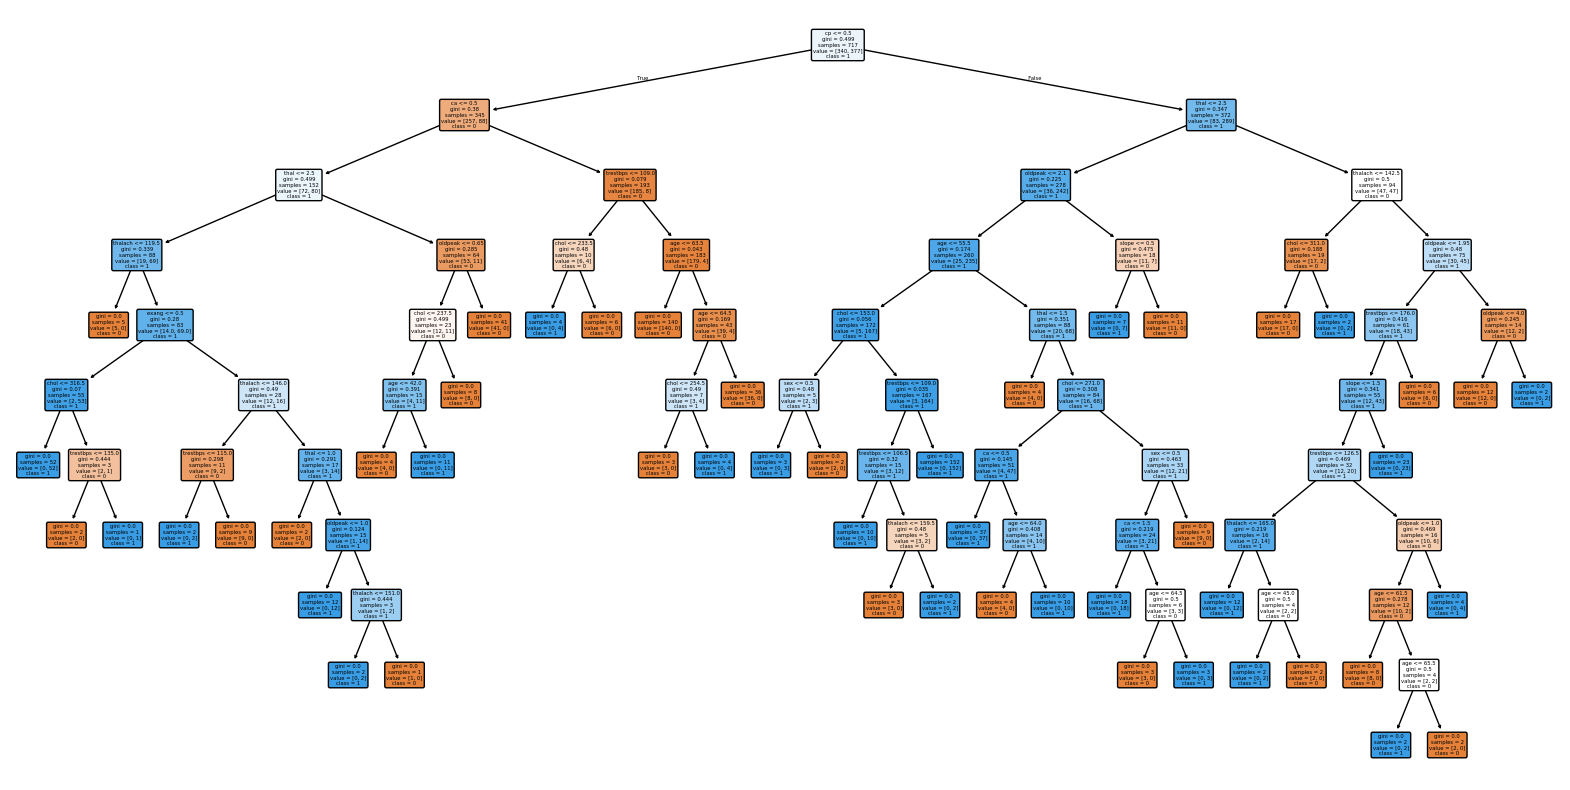

In [12]:
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=['0','1'], filled=True, rounded=True)
plt.show()

**Controlling Overfitting**

In [13]:
dtree_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree_limited.fit(X_train, y_train)

y_pred_limited = dtree_limited.predict(X_test)
print(f"Accuracy with Limited Depth: {accuracy_score(y_test, y_pred_limited):.2f}")

Accuracy with Limited Depth: 0.83


**Random Forest Classifier**

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



**Feature Importance**

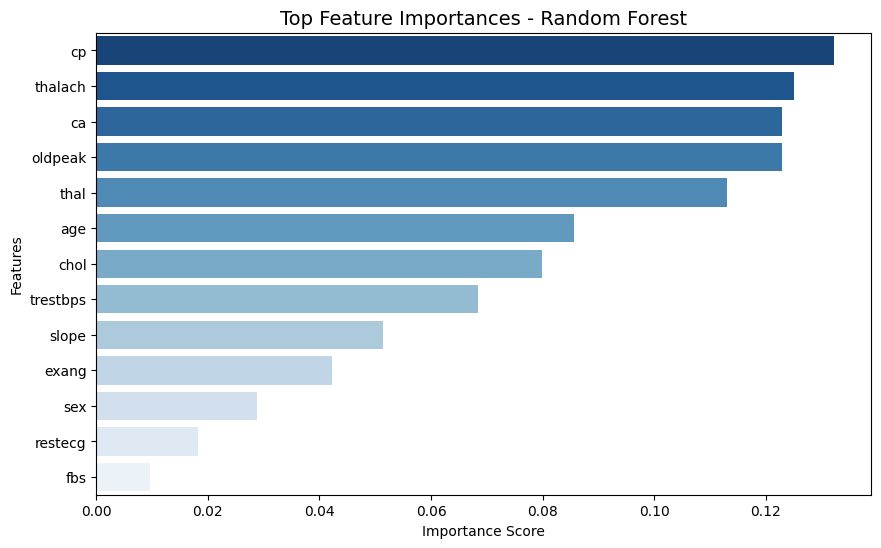

In [18]:
feat_importance_df = feat_importance.reset_index()
feat_importance_df.columns = ['Feature', 'Importance']

plt.figure(figsize=(10,6))
sns.barplot(data=feat_importance_df, x='Importance', y='Feature', hue='Feature', palette='Blues_r', dodge=False, legend=False)
plt.title("Top Feature Importances - Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

**Cross Validation**

In [19]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 1.00
